In [1]:
%pylab inline
import sklearn

#plt.style.use('seaborn')
import seaborn as sns; sns.set()

Populating the interactive namespace from numpy and matplotlib


# 无监督学习算法之   ***聚类***


分类、回归算法都于**有监督机器学习方法**。现在我们开始介绍**无监督学习算法**。

 
 

**在无监督学习中，目标属性是不存在的（也就是只有 X 没有 y）。**

 
 

最常用的无监督学习算法有**聚类**和**降维**。

![](http://i0.wp.com/dataaspirant.com/wp-content/uploads/2014/09/post2_final.png?resize=690,367)

# 聚类

根据已知的数据特征，**把数据划分不同的类别**。


每个类别内的数据比较相似 -- “物以类聚，人以群分”。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1574764739866&di=42320d3968aeb6b3ff9f6c3e0388fe05&imgtype=jpg&src=http%3A%2F%2Fimg3.imgtn.bdimg.com%2Fit%2Fu%3D3952619168%2C920308111%26fm%3D214%26gp%3D0.jpg)

# 应用与意义



    商务上，从客户基本库中发现不同的客户群，用购买模式来刻画不同的客户群的特征;
    生物学上，推导植物和动物的分类，对基因进行分类，获得对种群中固有结构的认识;
    对Web上的文档进行分类，以发现信息;
    
    ...
    
#### 直到今天，回顾我们的科学史，很多重要的工作就是发现各种新事物，然后给新事物分类。

![](https://cn.bing.com/th?id=OIP.aGUY2XpHMr3Q6TpAdvjGLwHaFj&pid=Api&rs=1)

# 簇 (cluster)


前面我们讲到把数据划分为不同类别，机器学习给这个类别定义一个新的名字—**簇**。


将具有$M$个样本的数据划分为$k$个簇，必然$k<=M$，且满足：


* 每个簇至少包含一个对象
* 每个对象属于且仅属于一个簇
* 将满足上述条件的k个簇称为一个合理的聚类划分

![](http://p1.pstatp.com/large/48300054b89af3b09f9)

# 1 k-means 聚类

参考：https://www.jianshu.com/p/2fa67f9bad60

思想简单，广泛使用的聚类算法。

假设输入样本为 $T=\{X_1,X_2,...,X_n\}$，算法流程为：

* 选择作为初始点的 $k$ 个**类别中心点** $a_1,a_2, ..., a_k$
* 遍历 $X_i$ ，每个 $X_i$ 被划分到离它最近的 $a_j$ 所属的类别
* 对每个类别，计算该类别内所有点的平均值，作为新的 $a_j$
* 重复以上过程，直到达到收敛条件（达到最大迭代次数、簇中心点变化微小、等） 

下图形象地演示了整个过程：

 ![](https://upload-images.jianshu.io/upload_images/1652713-5fbb494c6e5a0071.png?imageMogr2/auto-orient/strip|imageView2/2/w/552)    


# k-means 损失函数

最终的目的：调整中心点的位置，使得每个样本到中心点的距离的和最小。

所有样本到各自中心点的距离和为：

$J(a_1, a_2, ..., a_k) = \sum_{j=1}^k \sum_{i=1} ^ {N_j} (x_i - a_j)^2$

这就是 k-means 聚类的**损失函数**。

把损失函数降低到**极小值**，要求其对各个变量的偏导数为0。可以证明这等价于操作：

$a_j = \sum_{i=1}^{N_j} \frac{x_i}{N_j}$

即更新中心点为簇中所有样本平均值。

# k-means 聚类的缺点



1. **异常点敏感**

    如果簇中存在异常点,将导致均值偏差比较严重。

    例如：一个簇中有2、4、6、8、100五个数据,那么新的中心点为24，离绝大多数点都比较远。

    对策：**使用中位数可能比使用均值的想法更好**,使用中位数的聚类方式叫做 K-Mediods聚类(K中值聚类)
    

2. **初值敏感**

    选择不同的初始值可能导致不同的簇划分规则。
    
    例如，下面明显应当分4簇的数据，如果这样取初始点，
    
     ![](https://upload-images.jianshu.io/upload_images/1652713-5d2bd28b0dabec8c.png?imageMogr2/auto-orient/strip|imageView2/2/w/289)   
     
     会得到：
     
     ![](https://upload-images.jianshu.io/upload_images/1652713-a2956b96d84d01bd.png?imageMogr2/auto-orient/strip|imageView2/2/w/236)
    
    
    
    一个对策：可以初始化多套初始节点构造不同的分类规则,然后选择最优的构造规则**

# sklearn 实现

（以下参考 Jake Vanderplas 的教程： https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.2-Clustering-KMeans.ipynb ）

In [2]:
from sklearn import cluster
from sklearn import datasets

### 用 make_blobs 生成 4 团高斯球

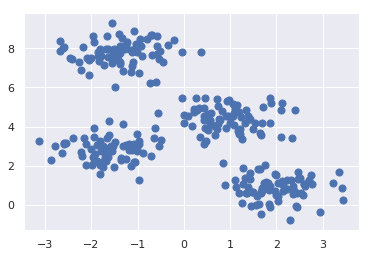

In [3]:
X, y = datasets.make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], s=50);

### 用 k-means 分为 4 类

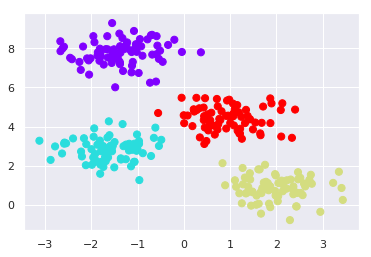

In [4]:
model = cluster.KMeans(4)
model.fit(X)
y_means = model.predict(X)
plt.scatter(X[:,0],X[:,1], c=y_means, s=50, cmap='rainbow')

### k-means 在 digits 的应用 
（https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.2-Clustering-KMeans.ipynb ）

作为接近真实世界的例子，我们使用 KMeans 把64维度的数据划分为10类。我们看看KMeans给我们什么结果。

In [5]:
digits = datasets.load_digits()
model = cluster.KMeans(n_clusters=10)
clusters = model.fit_predict(digits.data)

### 即使没有标签，KMeans也能把数字分为有序的10类（除了8有点看不清）

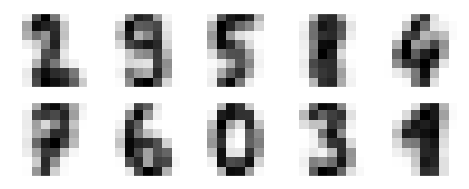

In [6]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2,5,1+i, xticks=[], yticks=[])
    ax.imshow(model.cluster_centers_[i].reshape((8,8)), cmap= cm.binary)

### 我们看看 KMeans 分类的 accuracy_score 有多少？

80% 不错啊！要知道，这可是 **无监督学习**！

In [7]:
from scipy.stats import mode

## 把每一个簇里 most common 的 target 数值挑出来，作为该簇的 target
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7941012799109627

# 1.2 Mini-batch KMeans 

KMeans算法的一种优化变种，**每次迭代不采用所有样本，而是每次等量的采样，然后进行中心节点的更新。**

Mini Batch K-Means算法可以减少K-Means算法的收敛时间，而且产生的结果效果只是略差于标准K-Means算法。

In [8]:
X, y = datasets.make_blobs(100000, centers = 8, random_state=0, cluster_std=1.5)

In [9]:
model = cluster.KMeans(8)

t1 = time.time()
y1 = model.fit_predict(X)
t2 = time.time()

print('time cost:  ', t2-t1, 'sec')

time cost:   2.517066717147827 sec


In [10]:
model = cluster.MiniBatchKMeans(8, batch_size=1000)

t1 = time.time()
y1 = model.fit_predict(X)
t2 = time.time()

print('time cost:  ', t2-t1, 'sec')

time cost:   0.27988100051879883 sec


# 1.3 高斯混合模型 （Gaussian mixture model, GMM）

融合几个单高斯模型，根据他们的加权叠加，近似描述某个数据样本。

如果融合的高斯模型个数足够多，它们之间的权重设定得足够合理，这个混合模型可以拟合任意分布的样本。

![](https://img-blog.csdn.net/20180714211500266?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2xpbl9saW1pbg==/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)

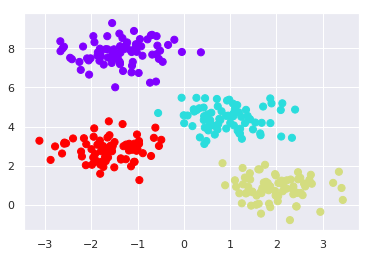

In [11]:
from sklearn import mixture


X, y = datasets.make_blobs(n_samples=300, centers=4,random_state=0, cluster_std=0.60)

model = mixture.GaussianMixture(n_components=4)
model.fit(X)

y_means = model.predict(X)
plt.scatter(X[:,0],X[:,1], c=y_means, s=50, cmap='rainbow')

# 1.4 谱聚类（Spectral clustering）

从图论中演化出来的算法。主要思想是：

    把所有的数据看做空间中的点，之间用边连接；
    
    距离较远的两个点的边权重值较低，而距离较近的两个点的边权重值较高。
    
    对所有数据点组成的图进行切图，达到：
    
            不同的子图间边权重和尽可能的低；
            
            子图内的边权重和尽可能的高。
            
![](https://cn.bing.com/th?id=OIP.Mfe5YuMhxZ9WVO7xFX8FFwHaE8&pid=Api&rs=1)

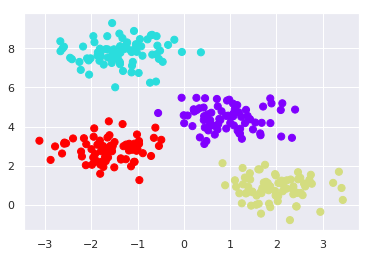

In [12]:
from sklearn import cluster

X, y = datasets.make_blobs(n_samples=300, centers=4,random_state=0, cluster_std=0.60)

model = cluster.SpectralClustering(n_clusters=4, )

y_means = model.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=y_means, s=50, cmap='rainbow')

# 1.5 密度聚类 DBSCAN ((Density-Based Spatial Clustering of Applications with Noise)


DBSCAN的核心思想是从某个核心点出发，不断向**密度可达**(处于一定距离之内，且密度都达到了某个阈值的，邻域点)的区域扩张。


最终，得到一个包含核心点和边界点的最大化区域，区域中任意两点**密度相连**（可通过依稀类中间点密度可达）。

**优点：基于密度的方法的特点是不依赖于距离，而是依赖于密度，从而克服基于距离的算法只能发现“球形”聚簇的缺点。**

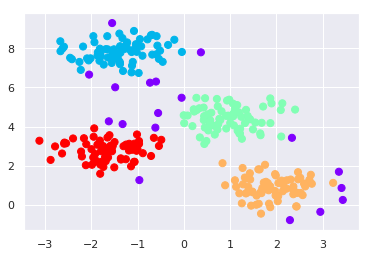

In [13]:
from sklearn import cluster

X, y = datasets.make_blobs(n_samples=300, centers=4,random_state=0, cluster_std=0.60)

model = cluster.DBSCAN( )

y_means = model.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=y_means, s=50, cmap='rainbow')

# 2 聚类评估

聚类方法怎么评估好坏呢？（这里没有标准答案的target可以比较啊！）

（以下 参考 https://blog.csdn.net/howhigh/article/details/73928635 ）

因此，有一些专业的统计方法，可以评估聚类的好坏～～～

我们介绍以下几种：

    调整兰德系数 （Adjusted Rand index）
    
    互信息评分（Mutual Information based scores）
    
    轮廓系数 Silhouette Coefficient
    

## 2.1 兰德系数(Rand index)

兰德系数需要有**已知的标签**，思想是**配对**。

假设真实的类别是$C$，聚类结果是$K$，

任取两个元素，看看它们在$C$和$K$中的分配情况是不是一致？

那么：

* $a$表示在$C$与$K$中都是同类别的**元素对**的数目
* $b$表示在$C$与$K$中都是不同类别的**元素对**的数目

则兰德指数为：

$RI = \frac{a+b}{n(n+1)/2}$

RI取值范围为[0,1]，值越大意味着聚类结果与真实情况越吻合。

## 调整兰德系数

兰德系数不”美“的地方在于，即使两个样本为完全随机，一般RI也不为0。

因此，为了实现**“在聚类结果随机产生的情况下，指标应该接近零”**，定义**“调整兰德系数” ARI （adjusted Rand Index）**:

$ARI = \frac{RI - E(RI)}{\max(RI)-E(RI)}$

**$E(RI)$为随机样本的兰德系数**。ARI取值范围为[-1,1]。

* 值越大意味着聚类结果与真实情况越吻合
* 随机意味着0
* 负数代表不好


**RI与ARI的缺点为：需要有真实标签。**

![](https://www.researchgate.net/profile/Farshid_Keivanian/post/How_to_apply_Adjusted_Rands_Index_ARI_in_Matlab/attachment/59d622196cda7b8083a1b9dd/AS:273811822317571%401442293233760/download/question+about+ARI.jpg)

## 2.2 互信息评分（Mutual Information based scores）

也是用来衡量两个数据分布的吻合程度，定义为：

${\rm MI} = \int_{X} \int_Y p(x,y)\log\left(\frac{p(x,y)}{p(x)p(y)}\right) dxdy$


互信息(Mutual Information)是信息论里一种有用的信息度量，它度量了两个变量之间的信息重叠。

互信息是非负的。如果X与Y相互独立，互信息为0。


与 ARI 类似，也可以定义 **调整互信息** AMI (adjusted mutual informatino)

$AMI = \frac{MI-E(MI)}{\max(H(X),H(Y))-E(MI)}$

其中$H(X)$与$H(Y)$为$X$与$Y$各自的信息熵。

AMI取值范围为[-1,1]，值越大意味着聚类结果与真实情况越吻合。

**互信息评分缺点为：也需要真实标签。**

![](https://cn.bing.com/th?id=OIP.tHSoXDkSmONLJEPVrmxGvQHaFN&pid=Api&rs=1)

## 2.3 轮廓系数 Silhouette Coefficient

轮廓系数适用于实际类别信息未知（没有标签）的情况。

#### 簇内不相似度 与  簇间不相似度

对于单个样本$i$:

* 计算样本$i$到同簇其他样本的平均距离$a_i$。

    $a_i$ 越小，说明样本$i$越应该被聚类到该簇。
    
    将$a_i$ 称为样本$i$的**簇内不相似度。**
    
    
* 计算样本$i$到其他某簇$C_j$的所有样本的平均距离$b_{ij}$，称为样本$i$与簇$C_j$ 的不相似度

    定义样本 $i$ 的簇间不相似度：$b_i ={\rm min}\{b_{i1}, b_{i2}, ..., b_{ik}\}$

    $b_i$ 越大，说明样本 $i$ 越不属于其他簇。

对任何一个的**单个样本**， $i$ 的轮廓系数为：

$s_i = \frac{b-a}{{\rm max}(a,b)}$

    如果接近 1，则说明聚类合理；如果接近-1，则说明更应该分类到另外的簇；

    如果近似为0，则说明样本在两个簇的边界上。

**所有样本的 $s_i$ 的均值称为聚类结果的轮廓系数**。是该聚类是否合理、有效的度量。

![](https://image1.slideserve.com/2511087/internal-measures-silhouette-coefficient-l.jpg)

In [14]:
from sklearn import metrics, neighbors 
from sklearn import datasets

digits = datasets.load_digits()

X, y = digits.data, digits.target

for model, model_type, model_name in [
    [cluster.KMeans(10), 'unsup', 'KMeans'],
    [neighbors.KNeighborsClassifier(), 'supervised', 'kNN'],
    [mixture.GaussianMixture(10), 'unsup', 'GMM'],
    ]:
    if model_type == 'unsup':
        model.fit(X)
    else:
        model.fit(X, y)
    y_predict = model.predict(X)
    print('model = ', model_name)
    print('\tARI: ', metrics.adjusted_rand_score(y, y_predict))
    print('\tAMI: ', metrics.adjusted_mutual_info_score(y, y_predict))
    print('\tSilhouette: ', metrics.silhouette_score(X, y_predict))

model =  KMeans
	ARI:  0.6670346840398546
	AMI:  0.733435739257599
	Silhouette:  0.18219185639267568


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


model =  kNN
	ARI:  0.9791786961266657
	AMI:  0.9765938113917956
	Silhouette:  0.16357161245611537


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


model =  GMM
	ARI:  0.6309627236639243
	AMI:  0.7283297577426767
	Silhouette:  0.14974601281575317


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


### 作业：

使用 make_blobs, make_circles, make_moons 以下数据，使用 KMeans, MiniKMeans, GMM, Spectral Clustering, DBSCAN (建议设置eps=0.3) 分群。


        X, y = datasets.make_blobs(500, n_features=2, random_state=0, centers=4, cluster_std=0.3)
        
        X, y = datasets.make_blobs(1000, n_features=2, random_state=0, centers = 8, cluster_std=1.5)
        
        X, y = datasets.make_circles(200, random_state=1, factor=0.1, noise=0.1, )
        
        X, y = datasets.make_moons(500, random_state=0,  noise=0.05, )
        
        1. 画图观察分群的结果，与原始标签对比。
        
        2. 计算 ARI AMI SI
        
        3. 思考为什么除 DBSCAN 外的算法大都在 circles 和 moons 的表现糟糕
        
        4. 应用核方法改进 KMeans 在 circles 上的表现

In [15]:
import scipy 
def ClusteringPlot(X, y, ncenters, deg_ext = []):
    ## 下面的大家自己写。。。

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI wil

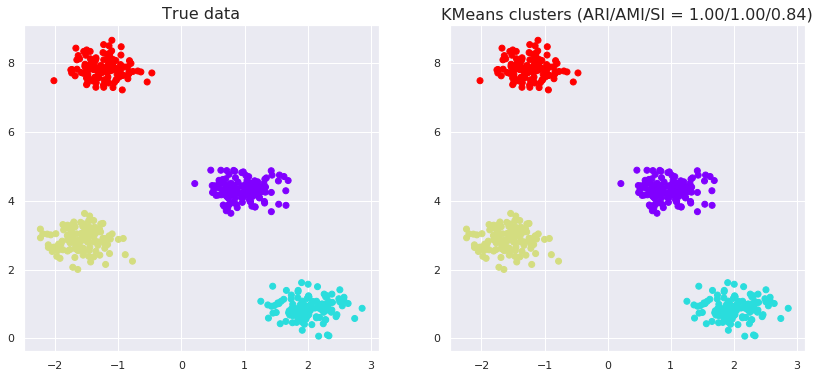

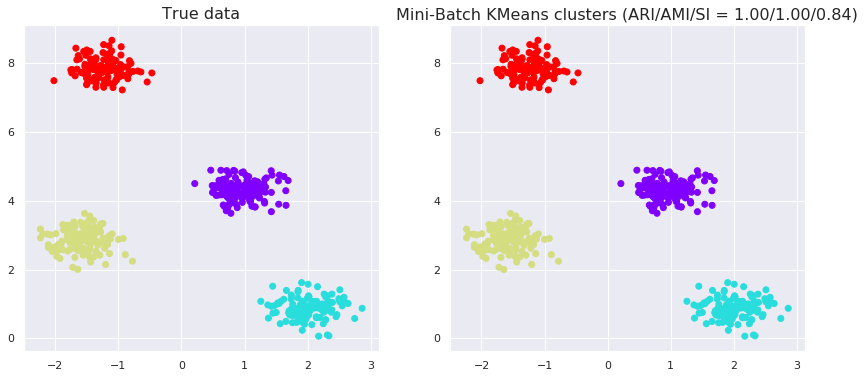

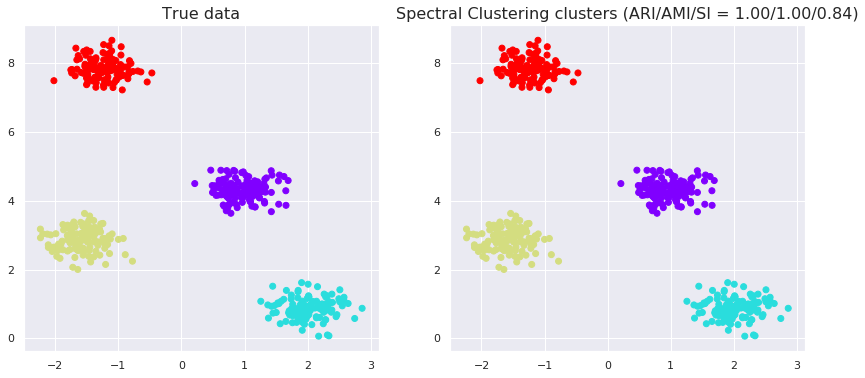

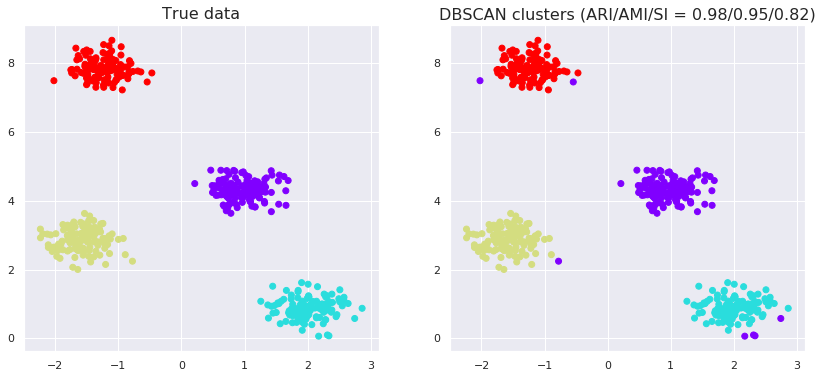

In [16]:
X, y = datasets.make_blobs(500, n_features=2, random_state=0, centers=4, cluster_std=0.3)
ClusteringPlot(X, y, 4, )

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI wil

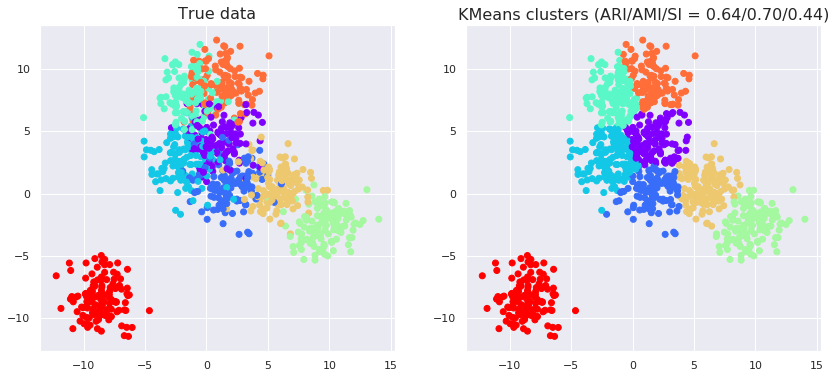

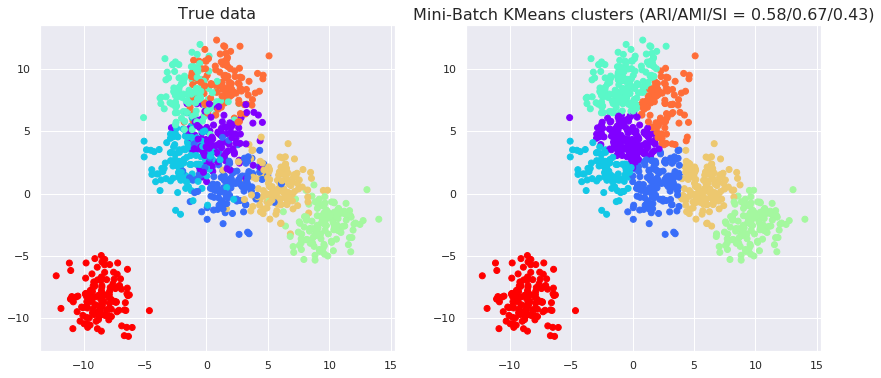

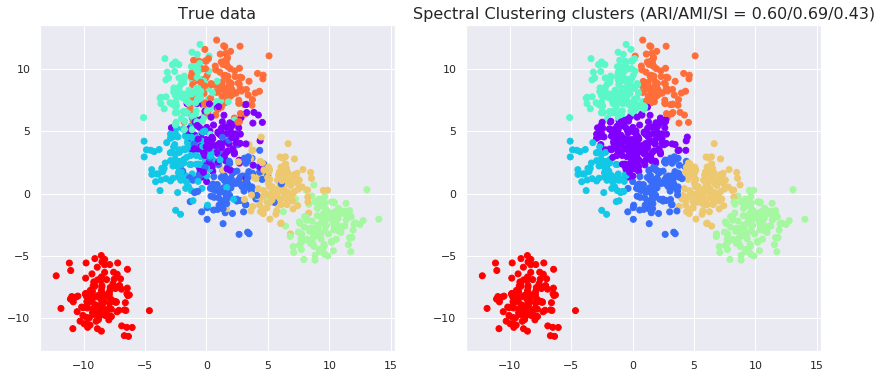

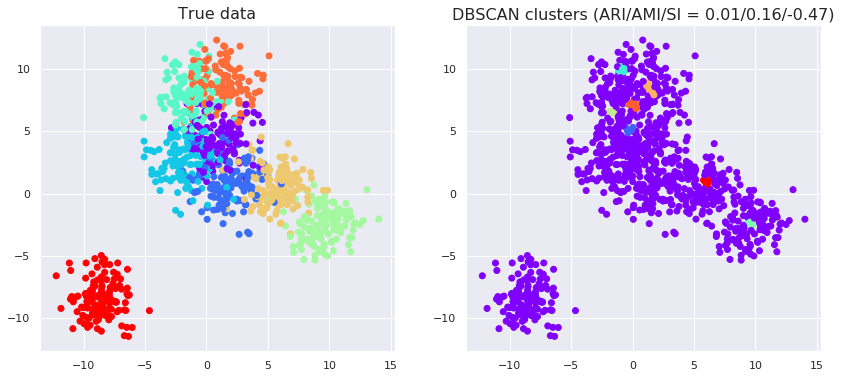

In [17]:
X, y = datasets.make_blobs(1000, n_features=2, centers = 8, random_state=0, cluster_std=1.5)
ClusteringPlot(X, y, 8, )

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI wil

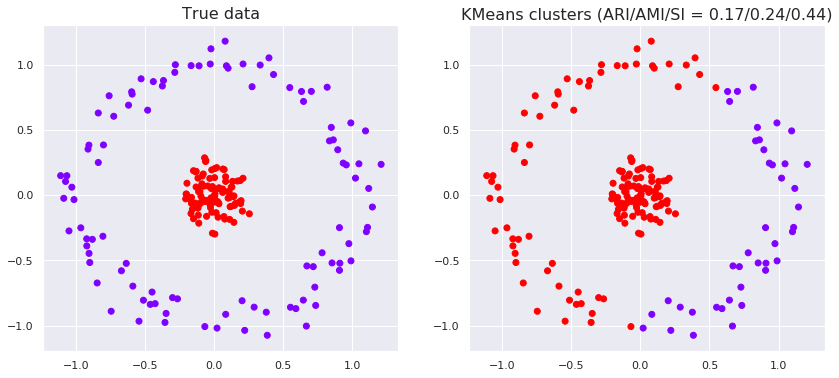

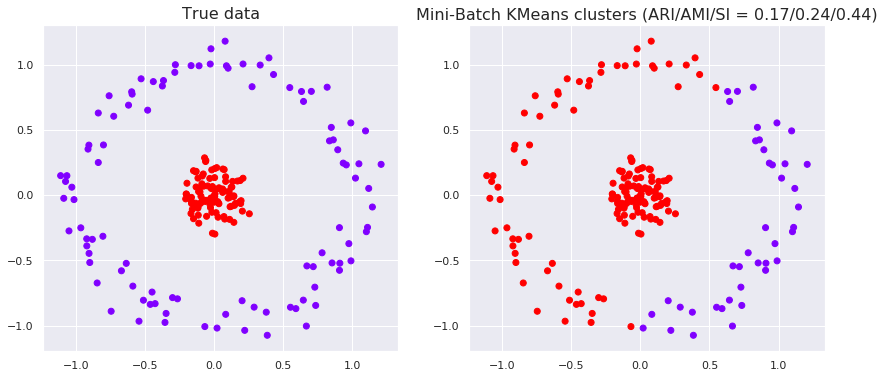

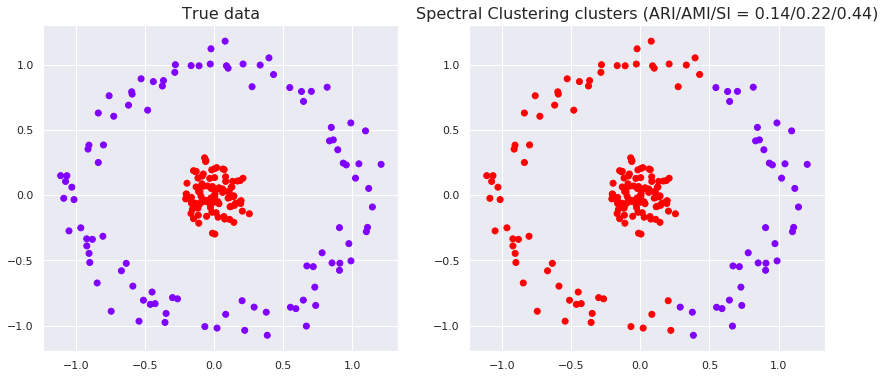

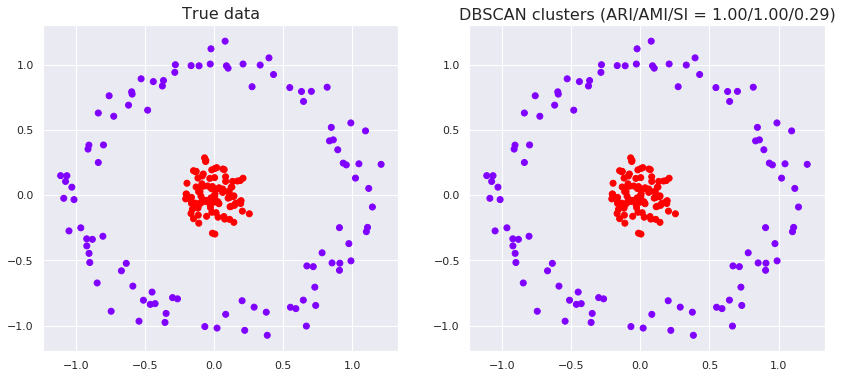

In [18]:
X, y = datasets.make_circles(200, random_state=1, factor=0.1, noise=0.1, )
ClusteringPlot(X, y, 2,  rbf_ext=False)

KMeans, Using rbf kernel:


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


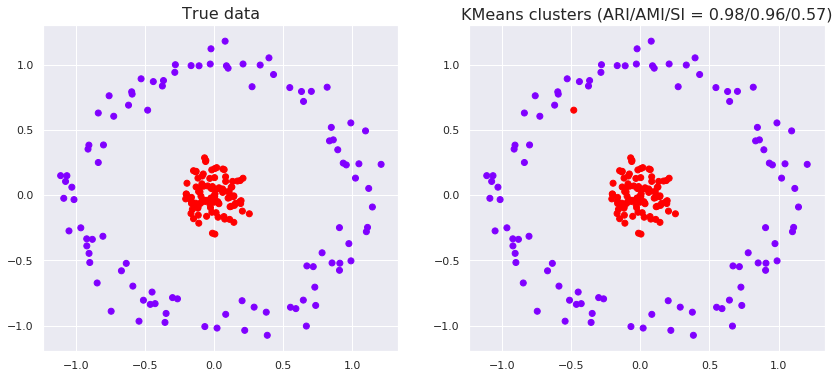

In [19]:
X, y = datasets.make_circles(200, random_state=1, factor=0.1, noise=0.1, )
print('KMeans, Using rbf kernel:')
ClusteringPlot(X, y, 2,  rbf_ext=True)

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI wil

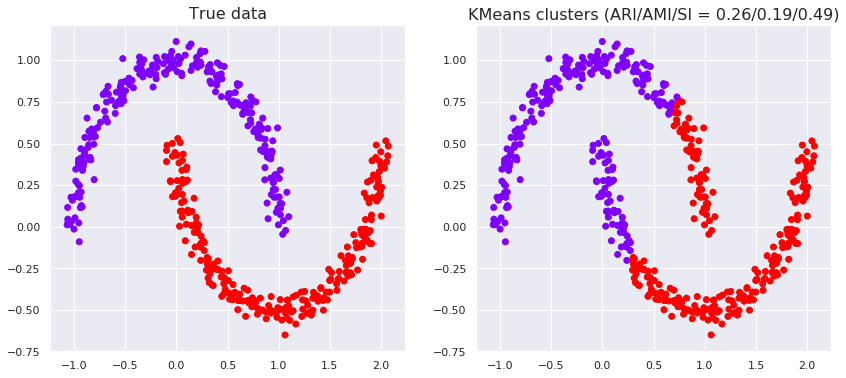

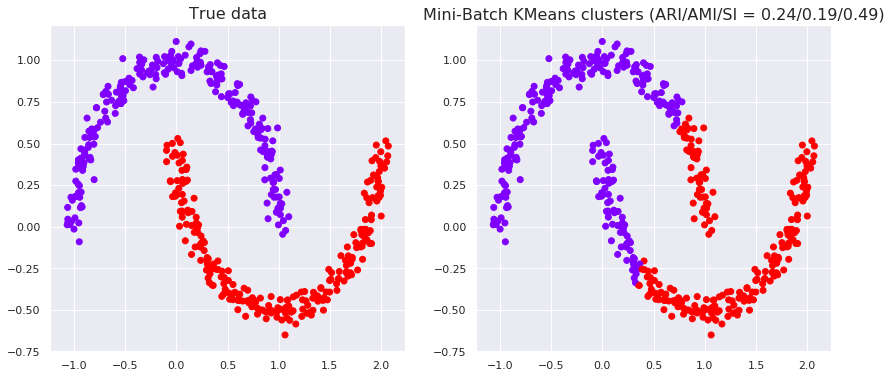

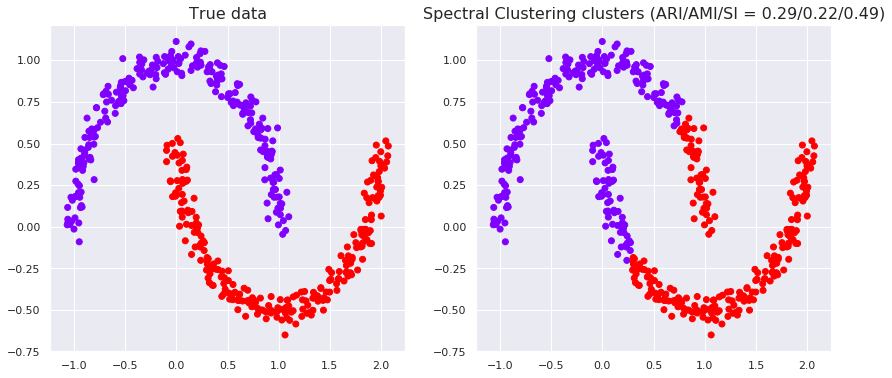

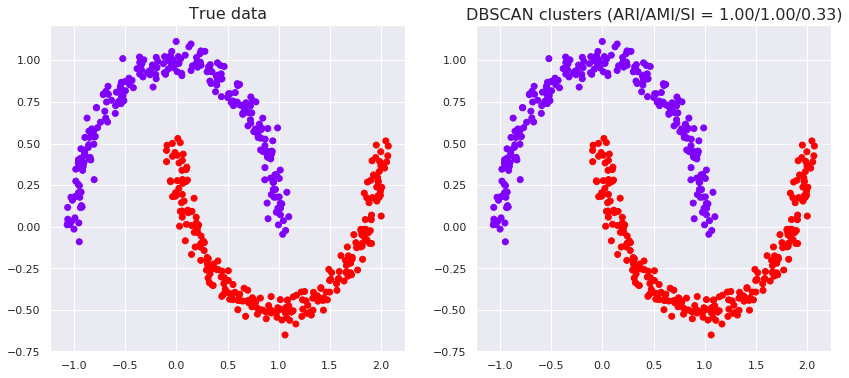

In [20]:
X, y = datasets.make_moons(500, random_state=0,  noise=0.05, )
ClusteringPlot(X, y, 2,  rbf_ext=False)